# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [5]:
# Series can be created from python dictionary too.
# Note that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [8]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    0.299505
b   -0.146640
c   -0.473929
d   -0.738431
e   -1.934706
dtype: float64
a         NaN
b   -0.293280
c   -0.947858
d   -1.476861
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [9]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2023,11,22,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2023'
# or alternatively
date = '22/11/2023 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2023-11-22
2023-11-22 10:45:10.000015
22/11/2023 10:45:00
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-23 10:45:00',
               '2023-11-24 10:45:00', '2023-11-25 10:45:00',
               '2023-11-26 10:45:00', '2023-11-27 10:45:00',
               '2023-11-28 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 10:45:01',
               '2023-11-22 10:45:02', '2023-11-22 10:45:03',
               '2023-11-22 10:45:04', '2023-11-22 10:45:05',
               '2023-11-22 10:45:06', '2023-11-22 10:45:07',
               '2023-11-22 10:45:08', '2023-11-22 10:45:09',
               ...
               '2023-11-22 11:44:50', '2023-11-22 11:44:51',
               '2023-11-22 11:44:52', '2023-11-22 11:44:53',
               '2023-11-22 11:44:54', '2023-11-22 11:44:55',
               '2023-11-22 11:44:56', '2023-11-22 11:44:57',
               '2023-11-22 11:44:58', '2023-11-22 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [20]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [25]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2023-11-22':'2023-11-28'], '\n') # Note - includes end time


2023-11-22 10:45:00    10.377990
2023-11-23 10:45:00    10.607328
2023-11-24 10:45:00     9.799846
2023-11-25 10:45:00    10.787163
Freq: D, dtype: float64 

2023-11-22 10:45:00    10.377990
2023-11-23 10:45:00    10.607328
2023-11-24 10:45:00     9.799846
2023-11-25 10:45:00    10.787163
2023-11-26 10:45:00    10.805564
2023-11-27 10:45:00    11.365215
2023-11-28 10:45:00     9.364066
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [26]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [27]:
entries=10
dates=pd.date_range('11/22/2023 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2023-11-22 10:45:00,0.587539,-0.020670,0.401485,-0.117265
2023-11-22 11:45:00,-1.343706,0.690868,-0.099681,-1.125835
2023-11-22 12:45:00,0.398816,-0.898396,0.908559,0.225778
2023-11-22 13:45:00,0.200901,0.882531,1.034844,-0.190717
2023-11-22 14:45:00,0.903122,1.275715,-0.649911,0.102210
2023-11-22 15:45:00,-0.403700,0.714451,1.219502,-1.479082
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,0.566423
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,0.204458
2023-11-22 18:45:00,-0.088758,0.753449,0.112322,-1.422022
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,1.215966


or by means of a dictionary:


In [30]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [31]:
df.head(2)

,A,B,C,D
2023-11-22 10:45:00,0.587539,-0.020670,0.401485,-0.117265
2023-11-22 11:45:00,-1.343706,0.690868,-0.099681,-1.125835


In [32]:
df.tail(4)

,A,B,C,D
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,0.566423
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,0.204458
2023-11-22 18:45:00,-0.088758,0.753449,0.112322,-1.422022
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,1.215966


In [33]:
df.index

DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 11:45:00',
               '2023-11-22 12:45:00', '2023-11-22 13:45:00',
               '2023-11-22 14:45:00', '2023-11-22 15:45:00',
               '2023-11-22 16:45:00', '2023-11-22 17:45:00',
               '2023-11-22 18:45:00', '2023-11-22 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [34]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [35]:
df.values

array([[ 0.58753886, -0.02066963,  0.40148491, -0.11726536],
       [-1.34370594,  0.69086768, -0.09968097, -1.12583473],
       [ 0.3988158 , -0.89839628,  0.90855936,  0.22577761],
       [ 0.20090125,  0.88253078,  1.03484373, -0.19071684],
       [ 0.90312227,  1.27571531, -0.64991096,  0.10220963],
       [-0.40370014,  0.71445054,  1.21950188, -1.47908207],
       [-0.00289941,  0.01674919,  1.82275013,  0.56642335],
       [ 0.50129053,  0.45515496, -0.15795516,  0.20445844],
       [-0.08875798,  0.75344878,  0.11232223, -1.42202178],
       [-0.53526617,  0.1443685 ,  1.40996349,  1.21596619]])

In [36]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.021734,0.401422,0.600188,-0.202009
std,0.655721,0.613385,0.797413,0.883303
min,-1.343706,-0.898396,-0.649911,-1.479082
25%,-0.324965,0.048654,-0.046680,-0.892055
50%,0.099001,0.573011,0.655022,-0.007528
75%,0.475672,0.743699,1.173337,0.220448
max,0.903122,1.275715,1.822750,1.215966


In [38]:
df.T

,2023-11-22 10:45:00,2023-11-22 11:45:00,2023-11-22 12:45:00,2023-11-22 13:45:00,2023-11-22 14:45:00,2023-11-22 15:45:00,2023-11-22 16:45:00,2023-11-22 17:45:00,2023-11-22 18:45:00,2023-11-22 19:45:00
A,0.587539,-1.343706,0.398816,0.200901,0.903122,-0.403700,-0.002899,0.501291,-0.088758,-0.535266
B,-0.020670,0.690868,-0.898396,0.882531,1.275715,0.714451,0.016749,0.455155,0.753449,0.144369
C,0.401485,-0.099681,0.908559,1.034844,-0.649911,1.219502,1.822750,-0.157955,0.112322,1.409963
D,-0.117265,-1.125835,0.225778,-0.190717,0.102210,-1.479082,0.566423,0.204458,-1.422022,1.215966


In [39]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,1.215966
2023-11-22 18:45:00,-0.088758,0.753449,0.112322,-1.422022
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,0.204458
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,0.566423
2023-11-22 15:45:00,-0.403700,0.714451,1.219502,-1.479082
2023-11-22 14:45:00,0.903122,1.275715,-0.649911,0.102210
2023-11-22 13:45:00,0.200901,0.882531,1.034844,-0.190717
2023-11-22 12:45:00,0.398816,-0.898396,0.908559,0.225778
2023-11-22 11:45:00,-1.343706,0.690868,-0.099681,-1.125835
2023-11-22 10:45:00,0.587539,-0.020670,0.401485,-0.117265


In [40]:
df.sort_values(by="C")

,A,B,C,D
2023-11-22 14:45:00,0.903122,1.275715,-0.649911,0.102210
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,0.204458
2023-11-22 11:45:00,-1.343706,0.690868,-0.099681,-1.125835
2023-11-22 18:45:00,-0.088758,0.753449,0.112322,-1.422022
2023-11-22 10:45:00,0.587539,-0.020670,0.401485,-0.117265
2023-11-22 12:45:00,0.398816,-0.898396,0.908559,0.225778
2023-11-22 13:45:00,0.200901,0.882531,1.034844,-0.190717
2023-11-22 15:45:00,-0.403700,0.714451,1.219502,-1.479082
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,1.215966
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,0.566423


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [41]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2023-11-22 10:45:00    0.587539
2023-11-22 11:45:00   -1.343706
2023-11-22 12:45:00    0.398816
2023-11-22 13:45:00    0.200901
2023-11-22 14:45:00    0.903122
2023-11-22 15:45:00   -0.403700
2023-11-22 16:45:00   -0.002899
2023-11-22 17:45:00    0.501291
2023-11-22 18:45:00   -0.088758
2023-11-22 19:45:00   -0.535266
Freq: H, Name: A, dtype: float64 

2023-11-22 10:45:00    0.587539
2023-11-22 11:45:00   -1.343706
2023-11-22 12:45:00    0.398816
2023-11-22 13:45:00    0.200901
2023-11-22 14:45:00    0.903122
2023-11-22 15:45:00   -0.403700
2023-11-22 16:45:00   -0.002899
2023-11-22 17:45:00    0.501291
2023-11-22 18:45:00   -0.088758
2023-11-22 19:45:00   -0.535266
Freq: H, Name: A, dtype: float64


In [42]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2023-11-22 10:45:00":"2023-11-22 12:45:00"])

                            A         B         C         D
2023-11-22 10:45:00  0.587539 -0.020670  0.401485 -0.117265
2023-11-22 11:45:00 -1.343706  0.690868 -0.099681 -1.125835
2023-11-22 12:45:00  0.398816 -0.898396  0.908559  0.225778
                            A         B         C         D
2023-11-22 10:45:00  0.587539 -0.020670  0.401485 -0.117265
2023-11-22 11:45:00 -1.343706  0.690868 -0.099681 -1.125835
2023-11-22 12:45:00  0.398816 -0.898396  0.908559  0.225778


### Selection by label

In [43]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.587539
B   -0.020670
C    0.401485
D   -0.117265
Name: 2023-11-22 10:45:00, dtype: float64

In [44]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2023-11-22 10:45:00,0.587539,-0.020670
2023-11-22 11:45:00,-1.343706,0.690868
2023-11-22 12:45:00,0.398816,-0.898396
2023-11-22 13:45:00,0.200901,0.882531
2023-11-22 14:45:00,0.903122,1.275715
2023-11-22 15:45:00,-0.403700,0.714451
2023-11-22 16:45:00,-0.002899,0.016749
2023-11-22 17:45:00,0.501291,0.455155
2023-11-22 18:45:00,-0.088758,0.753449
2023-11-22 19:45:00,-0.535266,0.144369


In [45]:
# showing label slicing, both endpoints are included:
df.loc['2023-11-22 14:45:00':'2023-11-22 16:45:00',['A','B']]

,A,B
2023-11-22 14:45:00,0.903122,1.275715
2023-11-22 15:45:00,-0.403700,0.714451
2023-11-22 16:45:00,-0.002899,0.016749


In [46]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-1.3437059364610635
-1.3437059364610635


### Selecting by position

In [47]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.200901
B    0.882531
C    1.034844
D   -0.190717
Name: 2023-11-22 13:45:00, dtype: float64 

                            A         B
2023-11-22 13:45:00  0.200901  0.882531
2023-11-22 14:45:00  0.903122  1.275715


In [48]:
# selecting rows 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2023-11-22 11:45:00,-1.343706,-0.099681
2023-11-22 12:45:00,0.398816,0.908559
2023-11-22 14:45:00,0.903122,-0.649911


In [49]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2023-11-22 11:45:00 -1.343706  0.690868 -0.099681 -1.125835
2023-11-22 12:45:00  0.398816 -0.898396  0.908559  0.225778 

                            B         C
2023-11-22 10:45:00 -0.020670  0.401485
2023-11-22 11:45:00  0.690868 -0.099681
2023-11-22 12:45:00 -0.898396  0.908559
2023-11-22 13:45:00  0.882531  1.034844
2023-11-22 14:45:00  1.275715 -0.649911
2023-11-22 15:45:00  0.714451  1.219502
2023-11-22 16:45:00  0.016749  1.822750
2023-11-22 17:45:00  0.455155 -0.157955
2023-11-22 18:45:00  0.753449  0.112322
2023-11-22 19:45:00  0.144369  1.409963


In [50]:
# selecting an individual element by position
df.iloc[1,1]
#df.iat[1,1]


0.6908676792076132

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [51]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2023-11-22 11:45:00,-1.343706,0.690868,-0.099681,-1.125835
2023-11-22 13:45:00,0.200901,0.882531,1.034844,-0.190717
2023-11-22 14:45:00,0.903122,1.275715,-0.649911,0.102210
2023-11-22 15:45:00,-0.403700,0.714451,1.219502,-1.479082
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,0.566423
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,0.204458
2023-11-22 18:45:00,-0.088758,0.753449,0.112322,-1.422022
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,1.215966


In [52]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2023-11-22 10:45:00,0.587539,NaN,0.401485,NaN
2023-11-22 11:45:00,NaN,0.690868,NaN,NaN
2023-11-22 12:45:00,0.398816,NaN,0.908559,0.225778
2023-11-22 13:45:00,0.200901,0.882531,1.034844,NaN
2023-11-22 14:45:00,0.903122,1.275715,NaN,0.102210
2023-11-22 15:45:00,NaN,0.714451,1.219502,NaN
2023-11-22 16:45:00,NaN,0.016749,1.822750,0.566423
2023-11-22 17:45:00,0.501291,0.455155,NaN,0.204458
2023-11-22 18:45:00,NaN,0.753449,0.112322,NaN
2023-11-22 19:45:00,NaN,0.144369,1.409963,1.215966


### Setting

Combination of selection and setting of values

In [53]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [54]:
df

,A,B,C,D,E,E prime
2023-11-22 10:45:00,0.000000,-0.020670,0.401485,5.0,0.0,0
2023-11-22 11:45:00,-1.343706,0.690868,-0.099681,5.0,0.5,2
2023-11-22 12:45:00,0.398816,-0.898396,0.908559,5.0,1.0,4
2023-11-22 13:45:00,0.200901,0.882531,1.034844,5.0,1.5,6
2023-11-22 14:45:00,0.903122,1.275715,-0.649911,5.0,2.0,8
2023-11-22 15:45:00,-0.403700,0.714451,1.219502,5.0,2.5,10
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,5.0,3.0,12
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,5.0,3.5,14
2023-11-22 18:45:00,-0.088758,0.753449,0.112322,5.0,4.0,16
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,5.0,4.5,18


In [55]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.020670,0.401485,5.0,0.0,0,1.000000
2023-11-22 11:45:00,-1.343706,0.690868,-0.099681,5.0,0.5,2,0.999962
2023-11-22 12:45:00,0.398816,-0.898396,0.908559,5.0,1.0,4,0.999848
2023-11-22 13:45:00,0.200901,0.882531,1.034844,5.0,1.5,6,0.999657
2023-11-22 14:45:00,0.903122,1.275715,-0.649911,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.403700,0.714451,1.219502,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,5.0,3.5,14,0.998135
2023-11-22 18:45:00,-0.088758,0.753449,0.112322,5.0,4.0,16,0.997564
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,5.0,4.5,18,0.996917


In [56]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.020670,-0.401485,-5.0,0.0,0,-1.000000
2023-11-22 11:45:00,-1.343706,-0.690868,-0.099681,-5.0,-0.5,-2,-0.999962
2023-11-22 12:45:00,-0.398816,-0.898396,-0.908559,-5.0,-1.0,-4,-0.999848
2023-11-22 13:45:00,-0.200901,-0.882531,-1.034844,-5.0,-1.5,-6,-0.999657
2023-11-22 14:45:00,-0.903122,-1.275715,-0.649911,-5.0,-2.0,-8,-0.999391
2023-11-22 15:45:00,-0.403700,-0.714451,-1.219502,-5.0,-2.5,-10,-0.999048
2023-11-22 16:45:00,-0.002899,-0.016749,-1.822750,-5.0,-3.0,-12,-0.998630
2023-11-22 17:45:00,-0.501291,-0.455155,-0.157955,-5.0,-3.5,-14,-0.998135
2023-11-22 18:45:00,-0.088758,-0.753449,-0.112322,-5.0,-4.0,-16,-0.997564
2023-11-22 19:45:00,-0.535266,-0.144369,-1.409963,-5.0,-4.5,-18,-0.996917


In [57]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.020670,0.401485,5.0,0.0,0,1.000000
2023-11-22 11:45:00,-1.343706,0.690868,-0.099681,5.0,0.5,2,0.999962
2023-11-22 12:45:00,0.398816,-0.898396,0.908559,5.0,1.0,4,0.999848
2023-11-22 13:45:00,0.200901,0.882531,1.034844,5.0,1.5,6,0.999657
2023-11-22 14:45:00,0.903122,1.275715,-0.649911,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.403700,0.714451,1.219502,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,5.0,3.5,14,0.998135
2023-11-22 18:45:00,-0.088758,0.753449,0.112322,5.0,4.0,16,0.997564
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,5.0,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [58]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2023-11-22 10:45:00,0.000000,-0.020670,0.401485,5.0,0.0,1.000000
2023-11-22 11:45:00,-1.343706,0.690868,-0.099681,5.0,0.5,0.999962
2023-11-22 12:45:00,0.398816,-0.898396,0.908559,5.0,1.0,0.999848
2023-11-22 13:45:00,0.200901,0.882531,1.034844,5.0,1.5,0.999657
2023-11-22 14:45:00,0.903122,1.275715,-0.649911,5.0,2.0,0.999391
2023-11-22 15:45:00,-0.403700,0.714451,1.219502,5.0,2.5,0.999048
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,5.0,3.0,0.998630
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,5.0,3.5,0.998135
2023-11-22 18:45:00,-0.088758,0.753449,0.112322,5.0,4.0,0.997564
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,5.0,4.5,0.996917


In [59]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.020670,0.401485,5.0,0.0,0,1.000000
2023-11-22 15:45:00,-0.403700,0.714451,1.219502,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,5.0,3.5,14,0.998135
2023-11-22 18:45:00,-0.088758,0.753449,0.112322,5.0,4.0,16,0.997564
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,5.0,4.5,18,0.996917


In [60]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.020670,0.401485,5.0,0.0,0,1.000000
2023-11-22 11:45:00,-1.343706,0.690868,-0.099681,5.0,0.5,2,0.999962
2023-11-22 12:45:00,0.398816,-0.898396,0.908559,5.0,1.0,4,0.999848
2023-11-22 13:45:00,0.200901,0.882531,1.034844,5.0,1.5,6,0.999657
2023-11-22 14:45:00,0.903122,1.275715,-0.649911,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.403700,0.714451,1.219502,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,5.0,3.5,14,0.998135
2023-11-22 18:45:00,-0.088758,0.753449,0.112322,5.0,4.0,16,0.997564
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,5.0,4.5,18,0.996917


In [61]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2023-11-22 18:45:00"))

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.020670,0.401485,5.0,0.0,0,1.000000
2023-11-22 11:45:00,-1.343706,0.690868,-0.099681,5.0,0.5,2,0.999962
2023-11-22 12:45:00,0.398816,-0.898396,0.908559,5.0,1.0,4,0.999848
2023-11-22 13:45:00,0.200901,0.882531,1.034844,5.0,1.5,6,0.999657
2023-11-22 14:45:00,0.903122,1.275715,-0.649911,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.403700,0.714451,1.219502,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,5.0,3.5,14,0.998135
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,5.0,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [62]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,NaN,0.401485,5.0,NaN,NaN,1.000000
2023-11-22 11:45:00,NaN,0.690868,NaN,5.0,0.5,2.0,0.999962
2023-11-22 12:45:00,0.398816,NaN,0.908559,5.0,1.0,4.0,0.999848
2023-11-22 13:45:00,0.200901,0.882531,1.034844,5.0,1.5,6.0,0.999657
2023-11-22 14:45:00,0.903122,1.275715,NaN,5.0,2.0,8.0,0.999391
2023-11-22 15:45:00,NaN,0.714451,1.219502,5.0,2.5,10.0,0.999048
2023-11-22 16:45:00,NaN,0.016749,1.822750,5.0,3.0,12.0,0.998630
2023-11-22 17:45:00,0.501291,0.455155,NaN,5.0,3.5,14.0,0.998135
2023-11-22 18:45:00,NaN,0.753449,0.112322,5.0,4.0,16.0,0.997564
2023-11-22 19:45:00,NaN,0.144369,1.409963,5.0,4.5,18.0,0.996917


In [63]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2023-11-22 13:45:00,0.200901,0.882531,1.034844,5.0,1.5,6.0,0.999657


In [64]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,True,True,False,False,True,True,False
2023-11-22 11:45:00,True,False,True,False,False,False,False
2023-11-22 12:45:00,False,True,False,False,False,False,False
2023-11-22 13:45:00,False,False,False,False,False,False,False
2023-11-22 14:45:00,False,False,True,False,False,False,False
2023-11-22 15:45:00,True,False,False,False,False,False,False
2023-11-22 16:45:00,True,False,False,False,False,False,False
2023-11-22 17:45:00,False,False,True,False,False,False,False
2023-11-22 18:45:00,True,False,False,False,False,False,False
2023-11-22 19:45:00,True,False,False,False,False,False,False


In [65]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.000000,0.401485,5.0,0.0,0.0,1.000000
2023-11-22 11:45:00,0.000000,0.690868,0.000000,5.0,0.5,2.0,0.999962
2023-11-22 12:45:00,0.398816,0.000000,0.908559,5.0,1.0,4.0,0.999848
2023-11-22 13:45:00,0.200901,0.882531,1.034844,5.0,1.5,6.0,0.999657
2023-11-22 14:45:00,0.903122,1.275715,0.000000,5.0,2.0,8.0,0.999391
2023-11-22 15:45:00,0.000000,0.714451,1.219502,5.0,2.5,10.0,0.999048
2023-11-22 16:45:00,0.000000,0.016749,1.822750,5.0,3.0,12.0,0.998630
2023-11-22 17:45:00,0.501291,0.455155,0.000000,5.0,3.5,14.0,0.998135
2023-11-22 18:45:00,0.000000,0.753449,0.112322,5.0,4.0,16.0,0.997564
2023-11-22 19:45:00,0.000000,0.144369,1.409963,5.0,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [70]:
df_wNan.fillna(method='pad')

/tmp/ipykernel_947/1387294891.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_wNan.fillna(method='pad')


,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,NaN,0.401485,5.0,NaN,NaN,1.000000
2023-11-22 11:45:00,NaN,0.690868,0.401485,5.0,0.5,2.0,0.999962
2023-11-22 12:45:00,0.398816,0.690868,0.908559,5.0,1.0,4.0,0.999848
2023-11-22 13:45:00,0.200901,0.882531,1.034844,5.0,1.5,6.0,0.999657
2023-11-22 14:45:00,0.903122,1.275715,1.034844,5.0,2.0,8.0,0.999391
2023-11-22 15:45:00,0.903122,0.714451,1.219502,5.0,2.5,10.0,0.999048
2023-11-22 16:45:00,0.903122,0.016749,1.822750,5.0,3.0,12.0,0.998630
2023-11-22 17:45:00,0.501291,0.455155,1.822750,5.0,3.5,14.0,0.998135
2023-11-22 18:45:00,0.501291,0.753449,0.112322,5.0,4.0,16.0,0.997564
2023-11-22 19:45:00,0.501291,0.144369,1.409963,5.0,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a row

In [68]:
# Some statistics (mean() just as an example)
# rows
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.037020
B          0.401422
C          0.600188
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2023-11-22 10:45:00    0.911545
2023-11-22 11:45:00    1.106778
2023-11-22 12:45:00    1.629832
2023-11-22 13:45:00    2.231133
2023-11-22 14:45:00    2.504045
2023-11-22 15:45:00    2.861329
2023-11-22 16:45:00    3.262176
2023-11-22 17:45:00    3.470946
2023-11-22 18:45:00    3.824940
2023-11-22 19:45:00    4.216569
Freq: H, dtype: float64 



In [75]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.020670,0.401485,5.0,0.0,0,1.000000
2023-11-22 11:45:00,-1.343706,0.670198,0.301804,10.0,0.5,2,1.999962
2023-11-22 12:45:00,-0.944890,-0.228198,1.210363,15.0,1.5,6,2.999810
2023-11-22 13:45:00,-0.743989,0.654333,2.245207,20.0,3.0,12,3.999467
2023-11-22 14:45:00,0.159133,1.930048,1.595296,25.0,5.0,20,4.998858
2023-11-22 15:45:00,-0.244567,2.644498,2.814798,30.0,7.5,30,5.997906
2023-11-22 16:45:00,-0.247466,2.661248,4.637548,35.0,10.5,42,6.996536
2023-11-22 17:45:00,0.253824,3.116403,4.479593,40.0,14.0,56,7.994670
2023-11-22 18:45:00,0.165066,3.869851,4.591915,45.0,18.0,72,8.992234
2023-11-22 19:45:00,-0.370200,4.014220,6.001879,50.0,22.5,90,9.989152


In [76]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.020670,0.401485,5.0,0.0,0,1.000000
2023-11-22 11:45:00,-1.343706,0.690868,-0.099681,5.0,0.5,2,0.999962
2023-11-22 12:45:00,0.398816,-0.898396,0.908559,5.0,1.0,4,0.999848
2023-11-22 13:45:00,0.200901,0.882531,1.034844,5.0,1.5,6,0.999657
2023-11-22 14:45:00,0.903122,1.275715,-0.649911,5.0,2.0,8,0.999391
2023-11-22 15:45:00,-0.403700,0.714451,1.219502,5.0,2.5,10,0.999048
2023-11-22 16:45:00,-0.002899,0.016749,1.822750,5.0,3.0,12,0.998630
2023-11-22 17:45:00,0.501291,0.455155,-0.157955,5.0,3.5,14,0.998135
2023-11-22 18:45:00,-0.088758,0.753449,0.112322,5.0,4.0,16,0.997564
2023-11-22 19:45:00,-0.535266,0.144369,1.409963,5.0,4.5,18,0.996917


In [77]:
df.apply(lambda x: x.max() - x.min())

A           2.246828
B           2.174112
C           2.472661
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [78]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2023-11-22 10:45:00   -0.020670
2023-11-22 11:45:00   -0.652838
2023-11-22 12:45:00   -0.499580
2023-11-22 13:45:00    1.083432
2023-11-22 14:45:00    2.178838
2023-11-22 15:45:00    0.310750
2023-11-22 16:45:00    0.013850
2023-11-22 17:45:00    0.956445
2023-11-22 18:45:00    0.664691
2023-11-22 19:45:00   -0.390898
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [79]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [80]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [81]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [82]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [83]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.503237,-1.930200,-1.773357,0.974860
1,-0.882727,-2.015653,0.298234,0.045142
2,-0.588840,0.167333,0.159186,-0.192660
3,1.315497,0.498781,-0.450287,0.142114
4,0.087991,-0.505721,0.062165,2.191445
5,0.990198,0.803791,1.022220,0.712750
6,-0.710227,-2.225833,-1.877085,-0.382540
7,0.843259,0.096024,0.098013,-1.070434
8,1.049678,0.788546,0.899443,1.193507
9,1.671199,-0.850926,-0.330824,0.618587


In [84]:
# divide it into pieaces row-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.503237 -1.930200 -1.773357  0.974860
 1 -0.882727 -2.015653  0.298234  0.045142
 2 -0.588840  0.167333  0.159186 -0.192660,
           0         1         2         3
 3  1.315497  0.498781 -0.450287  0.142114
 4  0.087991 -0.505721  0.062165  2.191445
 5  0.990198  0.803791  1.022220  0.712750
 6 -0.710227 -2.225833 -1.877085 -0.382540,
           0         1         2         3
 7  0.843259  0.096024  0.098013 -1.070434
 8  1.049678  0.788546  0.899443  1.193507
 9  1.671199 -0.850926 -0.330824  0.618587]

In [85]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.503237,-1.930200,-1.773357,0.974860
1,-0.882727,-2.015653,0.298234,0.045142
2,-0.588840,0.167333,0.159186,-0.192660
3,1.315497,0.498781,-0.450287,0.142114
4,0.087991,-0.505721,0.062165,2.191445
5,0.990198,0.803791,1.022220,0.712750
6,-0.710227,-2.225833,-1.877085,-0.382540
7,0.843259,0.096024,0.098013,-1.070434
8,1.049678,0.788546,0.899443,1.193507
9,1.671199,-0.850926,-0.330824,0.618587


In [86]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,0.503237,-1.930200,-1.773357,0.974860
1,-0.882727,-2.015653,0.298234,0.045142
2,-0.588840,0.167333,0.159186,-0.192660
3,1.315497,0.498781,-0.450287,0.142114
4,0.087991,-0.505721,0.062165,2.191445
5,0.990198,0.803791,1.022220,0.712750
6,-0.710227,-2.225833,-1.877085,-0.382540
7,0.843259,0.096024,0.098013,-1.070434
8,1.049678,0.788546,0.899443,1.193507
9,1.671199,-0.850926,-0.330824,0.618587


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [87]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

In [88]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,1.549606,0.927183
1,bar,one,-0.780582,0.488184
2,foo,two,0.365661,-1.235476
3,bar,three,0.009389,1.286542
4,foo,two,1.866664,-1.403901
5,bar,two,0.393673,-1.160684
6,foo,one,1.674131,-1.580239
7,foo,three,0.573132,1.128000


In [89]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,-0.377520,0.614042
foo,onetwotwoonethree,6.029193,-2.164433


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [90]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.081329
       two      -0.002595
baz    one       0.584695
       two      -0.388272
foo    one      -0.780204
       two      -1.192797
qux    one       0.020126
       two       0.498539
dtype: float64


In [91]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.780582  0.488184
    three  0.009389  1.286542
    two    0.393673 -1.160684
foo one    3.223737 -0.653056
    three  0.573132  1.128000
    two    2.232324 -2.639377

In [92]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.780582
            D    0.488184
     three  C    0.009389
            D    1.286542
     two    C    0.393673
            D   -1.160684
foo  one    C    3.223737
            D   -0.653056
     three  C    0.573132
            D    1.128000
     two    C    2.232324
            D   -2.639377
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<Axes: >

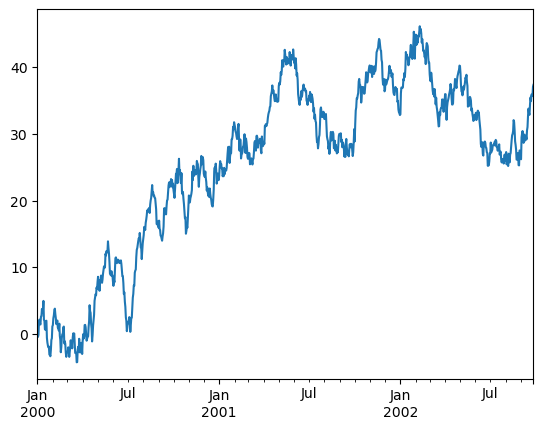

In [99]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

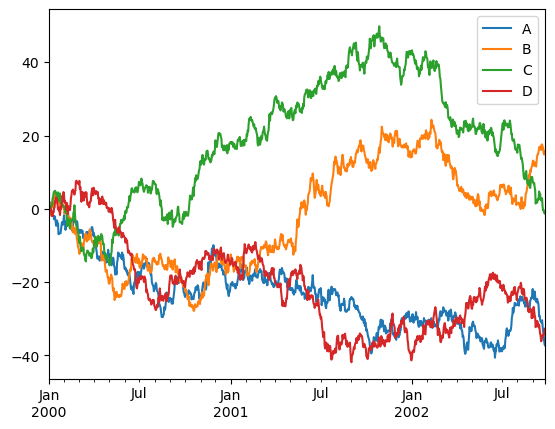

In [98]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')